In [227]:
#Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split

In [229]:
# For reading csv file
df_review = pd.read_csv('labeledTrainData.tsv',sep='\t')

In [231]:
df_review.head()

id  sentiment                                             review
0  5814_8          1  With all this stuff going down at the moment w...
1  2381_9          1  \The Classic War of the Worlds\" by Timothy Hi...
2  7759_3          0  The film starts with a manager (Nicholas Bell)...
3  3630_4          0  It must be assumed that those who praised this...
4  9495_8          1  Superbly trashy and wondrously unpretentious 8...

# Get the stemmed data using the same process you did in Week 3.

In [233]:
#Apply NLTK’s PorterStemmer
#imporitng PorterStemmer
from nltk import PorterStemmer

In [235]:
# apply steaming 
stemmer=PorterStemmer()
df_review['review']=df_review['review'].str.split()
df_review['review']=df_review['review'].apply(lambda x:' '.join([stemmer.stem(y) for y in x]))

In [237]:
df_review.head()

id  sentiment                                             review
0  5814_8          1  with all thi stuff go down at the moment with ...
1  2381_9          1  \the classic war of the worlds\" by timothi hi...
2  7759_3          0  the film start with a manag (nichola bell) giv...
3  3630_4          0  it must be assum that those who prais thi film...
4  9495_8          1  superbl trashi and wondrous unpretenti 80' exp...

In [239]:
#Convert each text entry into a word-count vector

# importing count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk import pos_tag_sents
from nltk import word_tokenize

In [241]:
# Converting to word count vector
count_vector=CountVectorizer()
count_vector.fit_transform(df_review['review'])

<25000x71507 sparse matrix of type '<class 'numpy.int64'>'
	with 3400476 stored elements in Compressed Sparse Row format>

In [243]:
# Converting to POS
pos=pos_tag_sents(df_review['review'].apply(word_tokenize).tolist())

In [245]:
pos

[[('with', 'IN'),
  ('all', 'DT'),
  ('thi', 'NN'),
  ('stuff', 'NN'),
  ('go', 'VBP'),
  ('down', 'RB'),
  ('at', 'IN'),
  ('the', 'DT'),
  ('moment', 'NN'),
  ('with', 'IN'),
  ('mj', 'NN'),
  ('i', 'NN'),
  ("'", "''"),
  ('v', 'JJ'),
  ('start', 'NN'),
  ('listen', 'VB'),
  ('to', 'TO'),
  ('hi', 'VB'),
  ('music', 'NN'),
  (',', ','),
  ('watch', 'VBP'),
  ('the', 'DT'),
  ('odd', 'JJ'),
  ('documentari', 'NN'),
  ('here', 'RB'),
  ('and', 'CC'),
  ('there', 'RB'),
  (',', ','),
  ('watch', 'VB'),
  ('the', 'DT'),
  ('wiz', 'NN'),
  ('and', 'CC'),
  ('watch', 'NN'),
  ('moonwalk', 'NN'),
  ('again', 'RB'),
  ('.', '.'),
  ('mayb', 'NN'),
  ('i', 'NN'),
  ('just', 'RB'),
  ('want', 'VBP'),
  ('to', 'TO'),
  ('get', 'VB'),
  ('a', 'DT'),
  ('certain', 'JJ'),
  ('insight', 'NN'),
  ('into', 'IN'),
  ('thi', 'JJ'),
  ('guy', 'NN'),
  ('who', 'WP'),
  ('i', 'VBZ'),
  ('thought', 'VBD'),
  ('wa', 'NN'),
  ('realli', 'NN'),
  ('cool', 'NN'),
  ('in', 'IN'),
  ('the', 'DT'),
  ('eighti', 

# Split this into a training and test set.

In [247]:
#importing preprocessing libraries
from sklearn import preprocessing

In [285]:
#splitting

x = df_review.drop(columns=['sentiment'],axis=1)
y = df_review[['sentiment']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

print(f"X training data size: {x_train.shape[0]}")
print(f"X testing data size: {x_test.shape[0]}")
print(f"Y training data size: {y_train.shape[0]}")
print(f"Y testing data size: {y_test.shape[0]}")

X training data size: 20000
X testing data size: 5000
Y training data size: 20000
Y testing data size: 5000


In [286]:
x_train.head()

id                                             review
10562  12390_4  after see a heavili censor version of thi movi...
20433   1369_4  ami heckerling' second film johnni danger is a...
17702  10155_9  i just can't understand the neg comment about ...
14101   4827_1  if thi movi as meant to discourag peopl from d...
9753    6023_1  thi remind me of when i wa a born-again believ...

In [287]:
x_test.head()

id                                             review
22782  2728_10  simpli one of the best ever! richard brooks' a...
20578   7800_1  beyond dirt cheap, thi shot-on-video exercis i...
8799    5381_4  four eye monster follow the relationship of a ...
10477   5565_8  i'm a fan of c&c, go back to their records, an...
19029   9640_2  i wa alway curiou about thi film becaus it is ...

In [288]:
x_train.shape, x_test.shape

((20000, 2), (5000, 2))

In [289]:
y_train.head()

sentiment
10562          0
20433          0
17702          1
14101          0
9753           0

In [290]:
y_test.head()

sentiment
22782          1
20578          0
8799           0
10477          1
19029          0

In [291]:
y_train.shape,y_test.shape

((20000, 1), (5000, 1))

# Fit and apply the tf-idf vectorization to the training set.

In [292]:
#importing library
from sklearn.feature_extraction.text import TfidfVectorizer

In [293]:
tfidfvectorizer = TfidfVectorizer(analyzer='word' , stop_words='english',)
tfidfvectorizer.fit(x_train['review'])
tfidf_train = tfidfvectorizer.transform(x_train['review'])

In [294]:
tfidf_train.shape

(20000, 64847)

# Apply but DO NOT FIT the tf-idf vectorization to the test set (Why?).

In [311]:
tfidf_test = tfidfvectorizer.transform(x_test['review'])

In [312]:
tfidf_test.shape

(5000, 64847)

Answer: We fit TF-IDF verctorization only for train data as we are going to train the system with the same data. We dont fit using test data as that will be the user input. If we fit even the test data then answers will be accurate, its like leaking the question paper to the students and you see that whole class passed with A grade :)

# Train a logistic regression using the training data.

In [313]:
#Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [314]:
#Create Logistic Regression Model
model = LogisticRegression()

In [315]:
model.fit(tfidf_train,y_train)

/Users/somashekarvayuvegula/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [316]:
predictions = model.predict(tfidf_test)

In [317]:
predictions.shape

(5000,)

# Find the model accuracy on test set.

In [318]:
from sklearn.metrics import accuracy_score

score = accuracy_score(y_test, predictions)
score

0.8818

# Create a confusion matrix for the test set predictions.

In [319]:
print(confusion_matrix(y_test, predictions))

[[2159  317]
 [ 274 2250]]


# Get the precision, recall, and F1-score for the test set predictions.

In [320]:
output_dict=True
pd.DataFrame(classification_report(y_test, predictions, output_dict=True)).T

precision    recall  f1-score    support
0              0.887382  0.871971  0.879609  2476.0000
1              0.876510  0.891442  0.883913  2524.0000
accuracy       0.881800  0.881800  0.881800     0.8818
macro avg      0.881946  0.881707  0.881761  5000.0000
weighted avg   0.881894  0.881800  0.881781  5000.0000

# Create a ROC curve for the test set.

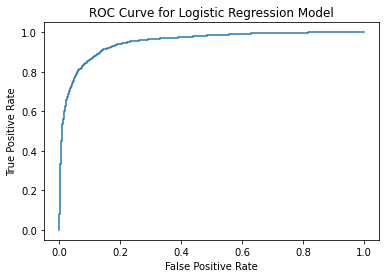

In [321]:
#define metrics
y_pred_proba = model.predict_proba(tdif_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('ROC Curve for Logistic Regression Model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Pick another classification model you learned about this week and repeat steps (5) – (9).

In [322]:
#Import libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt

In [323]:
#Create Logistic Regression Model
knnmodel = KNeighborsClassifier()

In [324]:
knnmodel.fit(tfidf_train,y_train.values.ravel())

KNeighborsClassifier()

In [326]:
knnpredictions = knnmodel.predict(tfidf_test)

In [335]:
#Find the model accuracy on test set

from sklearn.metrics import accuracy_score

knnscore = accuracy_score(y_test, knnpredictions)
knnscore

0.7788

In [336]:
#Create a confusion matrix for the test set predictions
print(confusion_matrix(y_test, knnpredictions))

[[1887  589]
 [ 517 2007]]


In [337]:
#Get the precision, recall, and F1-score for the test set predictions
output_dict=True
pd.DataFrame(classification_report(y_test, knnpredictions, output_dict=True)).T

precision    recall  f1-score    support
0              0.784942  0.762116  0.773361  2476.0000
1              0.773112  0.795166  0.783984  2524.0000
accuracy       0.778800  0.778800  0.778800     0.7788
macro avg      0.779027  0.778641  0.778673  5000.0000
weighted avg   0.778970  0.778800  0.778724  5000.0000

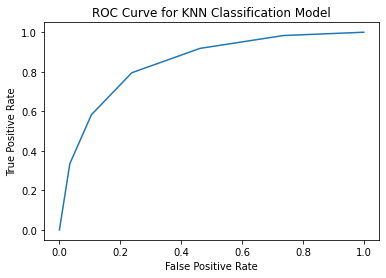

In [338]:
#define metrics
knn_y_pred_proba = knnmodel.predict_proba(tfidf_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  knn_y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.title('ROC Curve for KNN Classification Model')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()